In [1]:
#Kmeans Clustering

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/PRIYANSHU SHARMA/Desktop/PRIYANSHU/6 STUDY/6 SEMSTER/MACHINE LEARNING/LAB/breast.csv')
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [3]:
colnames=['ID', 'RADIUS', 'TEXTURE', 'PERIMETER', 'AREA', 'SMOOTHNESS', 'COMPACTNESS', 'CONCAVITY', 'CONCAVE', 'SYMMETRY', 'FRACTAL']
data = pd.read_csv('C:/Users/PRIYANSHU SHARMA/Desktop/PRIYANSHU/6 STUDY/6 SEMSTER/MACHINE LEARNING/LAB/breast.csv', names=colnames, header=None)
data.head()

,ID,RADIUS,TEXTURE,PERIMETER,AREA,SMOOTHNESS,COMPACTNESS,CONCAVITY,CONCAVE,SYMMETRY,FRACTAL
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(data,vars=colnames,hue='FRACTAL')

In [6]:
X, y = data.iloc[:, [2, 6]].values, data['FRACTAL']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_std=sc.fit_transform(X)
X_std

C:\Users\PRIYANSHU SHARMA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.69999505, -0.68697917],
       [ 0.28384518,  1.79966407],
       [-0.69999505, -0.41068547],
       ..., 
       [ 2.25152563, -0.13439178],
       [ 1.59563215,  0.14190191],
       [ 1.59563215,  0.4181956 ]])

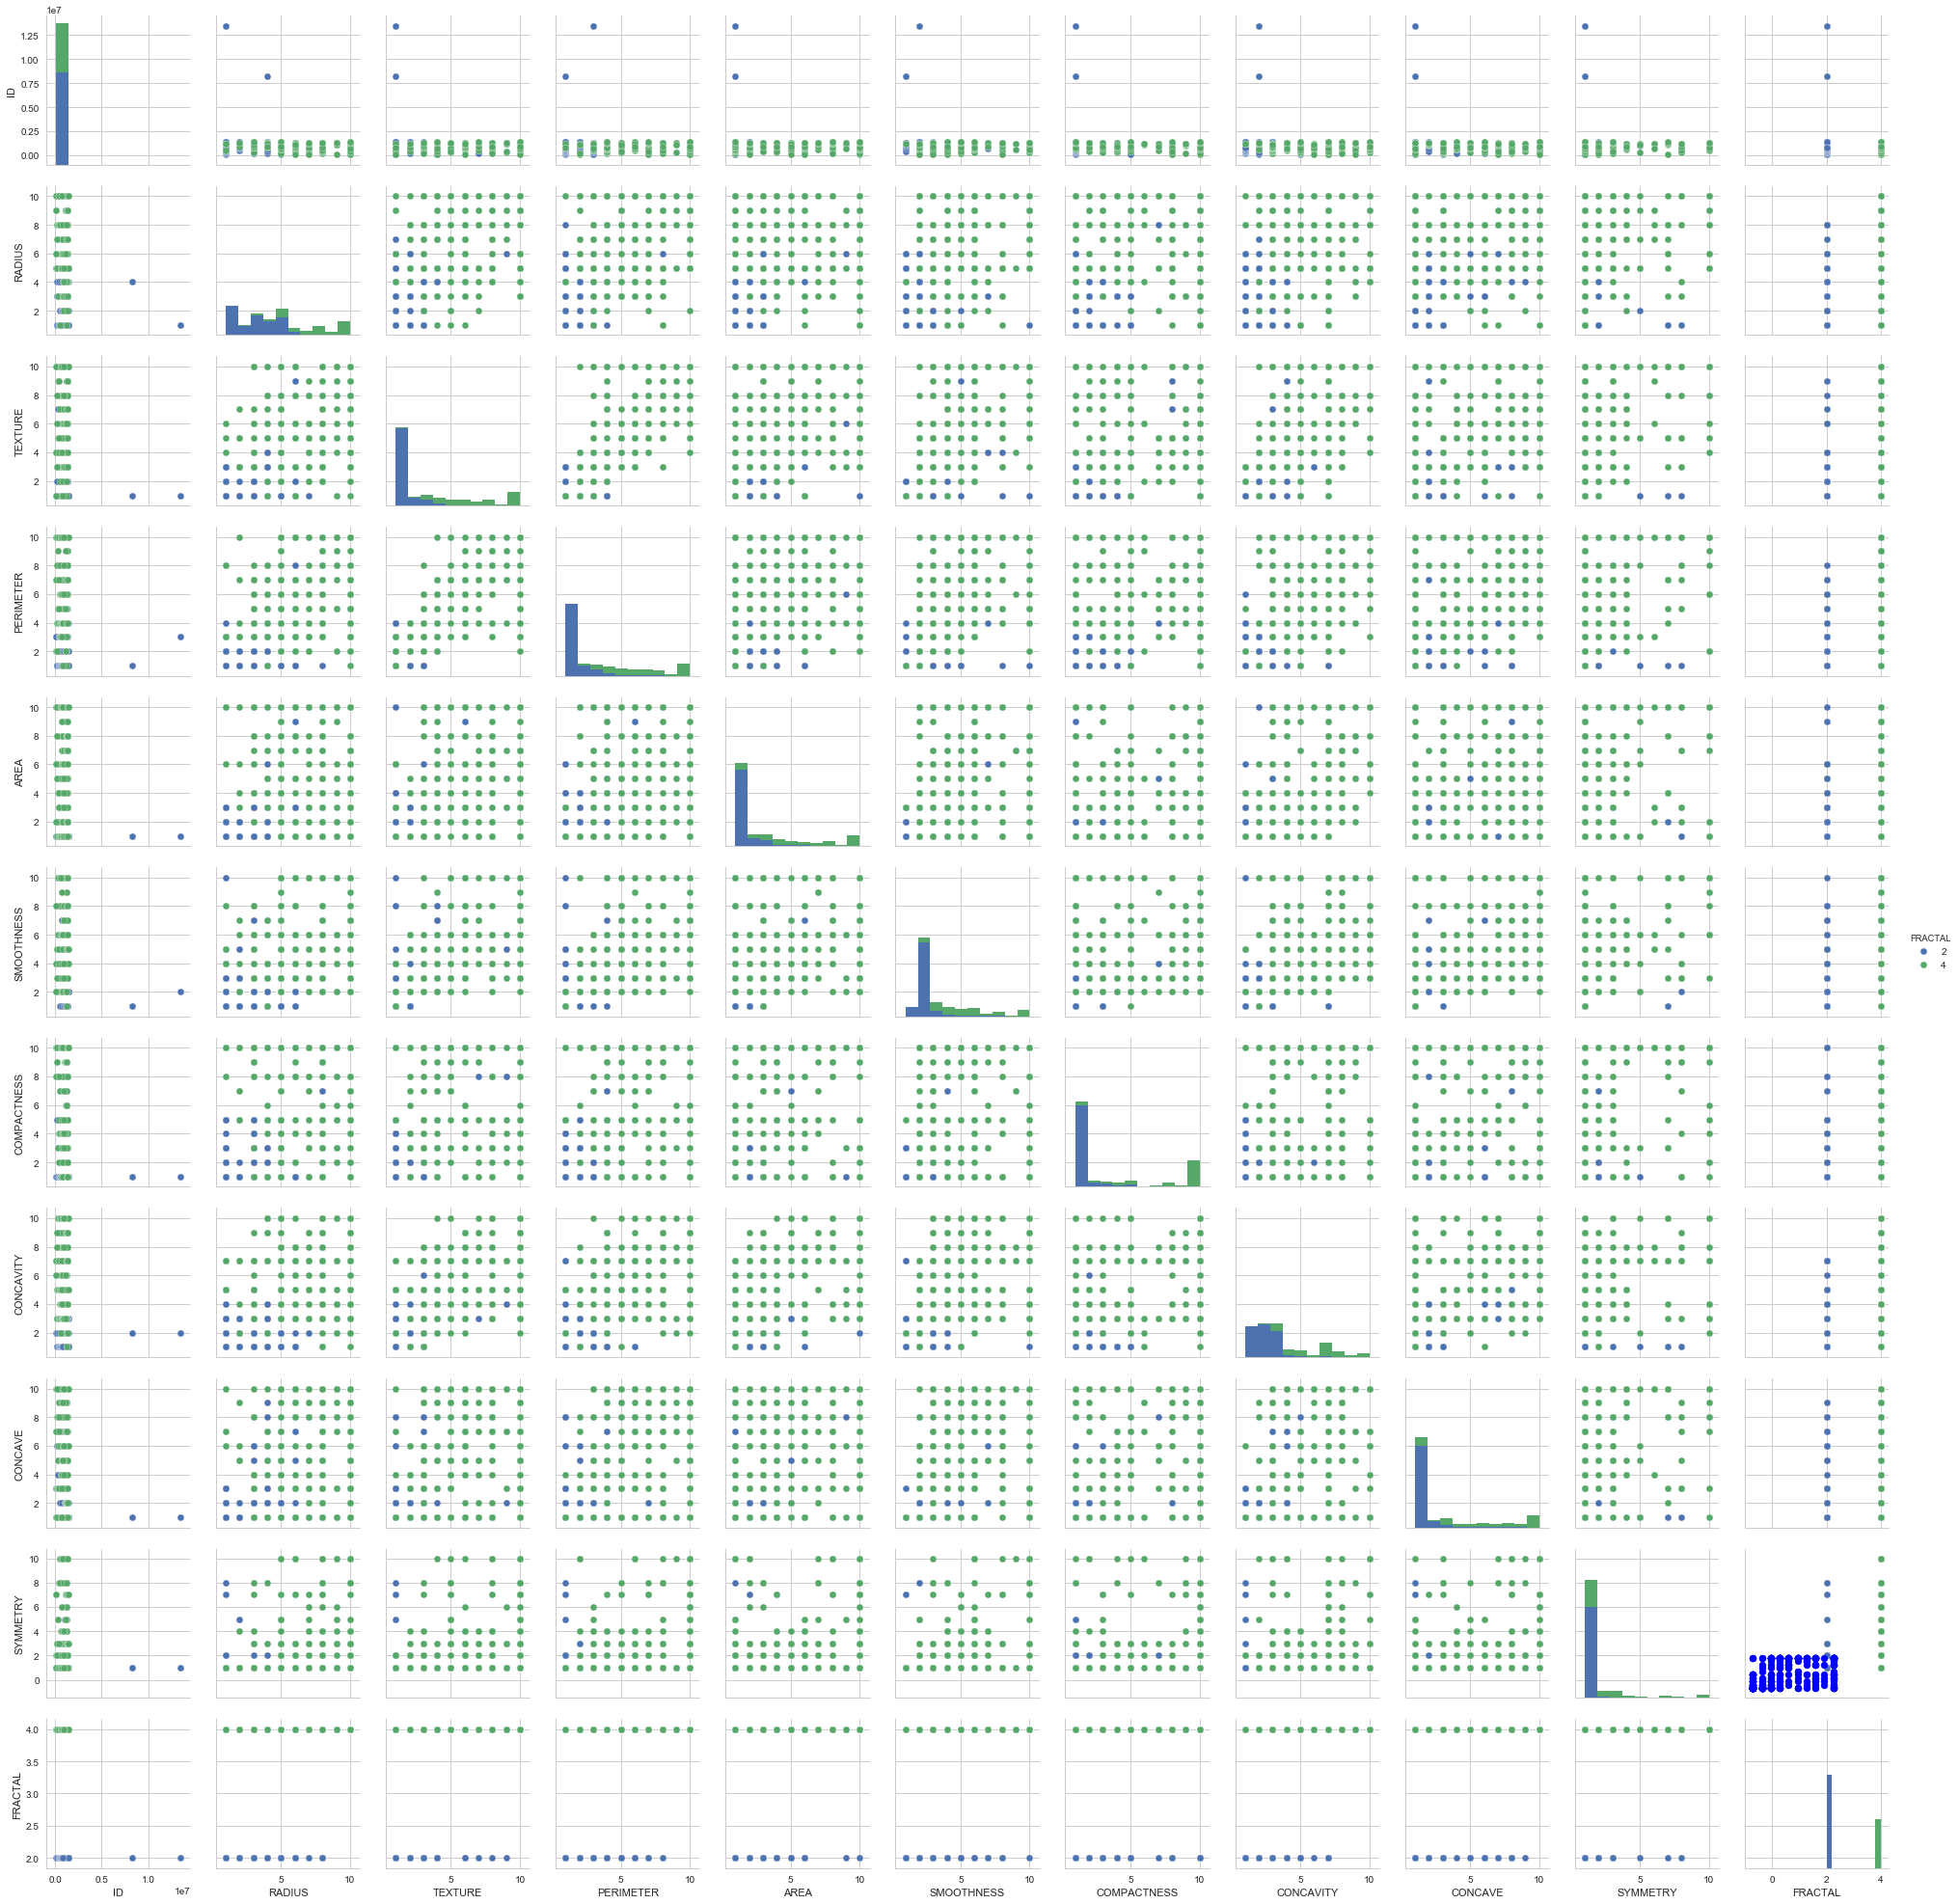

In [7]:
plt.scatter(X_std[:,0],X_std[:,1],c='blue',marker='o')
plt.grid()
plt.show()

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2,init='random',n_init=100,max_iter=30,tol=1e-04,random_state=0)
y_km = km.fit_predict(X_std)

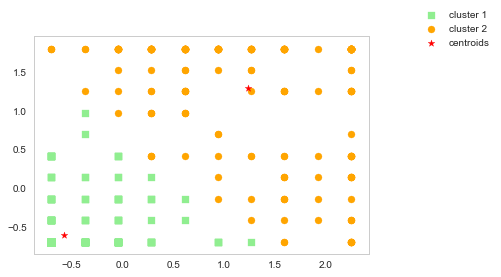

In [9]:
plt.scatter(X_std[y_km==0,0],X_std[y_km ==0,1],c='lightgreen',marker='s',label='cluster 1')
plt.scatter(X_std[y_km ==1,0],X_std[y_km ==1,1],c='orange',marker='o',label='cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',c='red',label='centroids')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.grid()
plt.show()

In [10]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 361.80


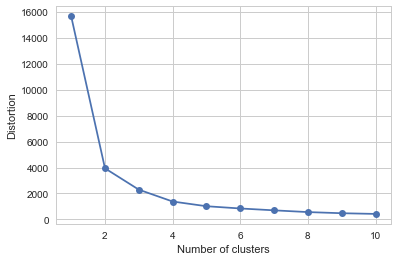

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

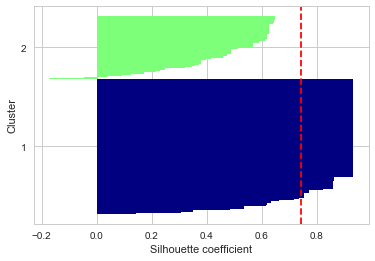

In [13]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import numpy as np
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X_std,y_km,metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height=1.0,
             edgecolor='none',
             color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()